In [2]:
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import csv
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_agraph import to_agraph 

In /Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [8]:
B = np.array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
	[1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
	[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])

# graph = csr_matrix(B)
# #print(B)

# n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
# print(n_components)
# print(labels)

### 1. check if it's simple or not
G = nx.from_numpy_matrix(B)
# degree = nx.laplacian_matrix(G).toarray()
#nx.draw(G, with_labels = True, color = 'blue')

A = to_agraph(G) 
A.layout('dot')  
A.draw('G.png')

### 2. check if it's possibly undirected or not
B_trans = B.T
check = np.all(B==B_trans)
print('Possibly undirected?: ', check)


### 3. check if all the components are connected or not
### 4. check when they can get all non-zero components
B_new = B
for i in range(10):
	B_new = B_new@B
 
	if np.all(B_new != 0):
		print('L which contains all non-zero comp:', i+2)
		break
print('L: \n', B_new)

### 5. the number of connected components
print('The number of connected components:', len(list(nx.connected_components(G))))

### 6. The maximum number of degree of the graph
print('The maximum number of degree of the graph:', max(G.degree, key=lambda item:item[1])[1])

### 7. 0-0 node value of B^5
B5 = B@B@B@B@B
print('0-0 node in B^5:', B5[0, 0])


Possibly undirected?:  True
L which contains all non-zero comp: 4
L: 
 [[19 14  7 21 12 11  2  7 11  5]
 [14 28  2 14  6 17  2 10 19 10]
 [ 7  2  4 10  7  2  1  1  2  2]
 [21 14 10 37 20 11  2  4  8 11]
 [12  6  7 20 18  4  5  2  9  9]
 [11 17  2 11  4 12  1  7 11  4]
 [ 2  2  1  2  5  1  3  1  5  2]
 [ 7 10  1  4  2  7  1  5  8  2]
 [11 19  2  8  9 11  5  8 19  9]
 [ 5 10  2 11  9  4  2  2  9 13]]
The number of connected components: 1
The maximum number of degree of the graph: 5
0-0 node in B^5: 46


In [20]:
with open('release_directed_graph.txt', 'rb') as file:
    G = nx.DiGraph()
    graph_array = np.loadtxt(file)
    #print(graph_array)
    for i in range(graph_array.shape[0]):
        G.add_edge(graph_array[i][0], graph_array[i][1])
    
    #print(G.degree)
    print('The number of nodes:', G.number_of_nodes())
    print('The number of edges:', G.number_of_edges())
    
    ### Print the image of graph
    # nx.draw(G, with_labels = True, edge_color = "blue")

    ### Export to the image file
    # A = to_agraph(G) 
    # A.layout('dot')  
    # A.draw('G2.png')

    ### 3. check if the graph contains self-loop or not
    print('The number of self-loops:', G.number_of_selfloops())

    ### 4. check if there is directed cycle or not
    print('Directed cycle:', nx.find_cycle(G, orientation="original"))



The number of nodes: 100
The number of edges: 1030
The number of self-loops: 8
Directed cycle: [(3.0, 4.0, 'forward'), (4.0, 3.0, 'forward')]


In [7]:
# nx.draw(G)
# plt.show()

In [8]:
### Modularity

C = np.array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
	[1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
	[0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
	[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])

G1_even = nx.Graph()
G2_odd = nx.Graph()
G = nx.Graph()

C_odd = []
C_even = []
x_axis = int(C.shape[0]/2)
# print(type(x_axis))
# print(x_axis)
y_axis = int(C.shape[1]/2)

for i in range(C.shape[0]):
    if i%2 == 0:
        for j in range(C.shape[1]):
            if j%2 == 0:
                # np.append(C_even, C[i][j])
                C_even.append(C[i][j])
                # print(C_even)
C_even_mat = np.array([C_even])
C_even_mat = C_even_mat.reshape(x_axis, y_axis)

for i in range(C.shape[0]):
    if i%2 == 1:
        for j in range(C.shape[1]):
            if j%2 == 1:
                C_odd.append(C[i][j])
C_odd_mat = np.array([C_odd])
C_odd_mat = C_odd_mat.reshape(x_axis, y_axis)

# print(C_odd_mat)
# print(C_even_mat)


G1_even = nx.from_numpy_matrix(C_even_mat)
G2_odd = nx.from_numpy_matrix(C_odd_mat)
G = nx.from_numpy_matrix(C)




In [9]:
def modularity_partition(A, part):
	m = A.sum()/2
	ks = A.sum(axis=0)
	return ( A[part].T[part].T - ks[part][:,None]*ks[part][None,:]/(2*m) ).sum()/(2*m)

def modularity(A, parts):
	return sum([ modularity_partition(A, p) for p in parts ])

modularity(C, [[0,2,4,6,8], [1,3,5,7,9]])

-0.20414201183431957

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

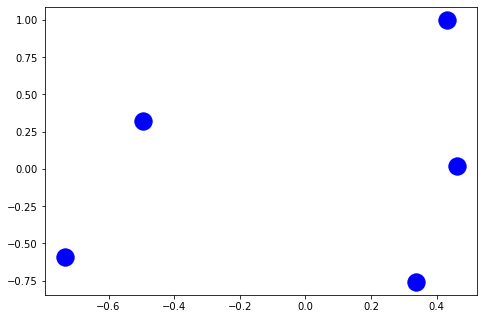

In [16]:
G1 = nx.DiGraph()
G1_list = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 2)]
G1.add_edges_from(G1_list)
nx.draw(G1, with_labels = True, node_color = 'blue')


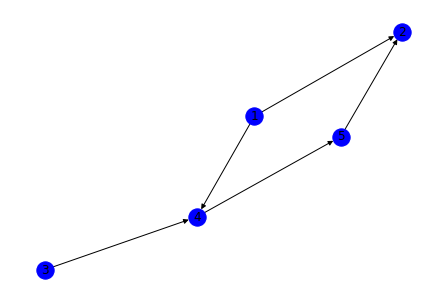

In [ ]:
G2 = nx.DiGraph()
G2_list = [(1, 2), (1, 4), (3, 4), (4, 5), (5, 2)]
G2.add_edges_from(G2_list)
nx.draw(G2, with_labels = True, node_color = 'blue')


In [ ]:
G4 = nx.MultiGraph()
G4_list = [(1, 2), (1, 4), (3, 4), (4, 5), (5, 2), (3, 3)]
G4.add_edges_from(G4_list)

# nx.draw(G4, with_labels = True, node_color = 'blue')
# nx.drawing.nx_agraph.write_dot(G4,'graph.dot')

A = to_agraph(G4) 
A.layout('dot')  
A.draw('G4.png')


c:\Users\shin\anaconda3\envs\6.86x\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


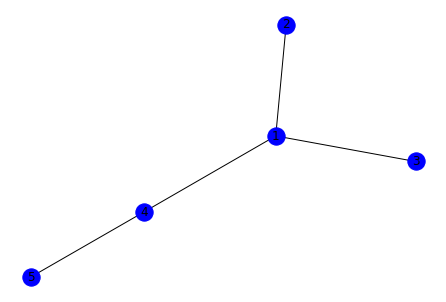

In [ ]:
G5 = nx.MultiGraph()
G5_list = [(1, 2), (1, 4), (3, 1), (4, 5)]
G5.add_edges_from(G5_list)

# nx.draw(G4, with_labels = True, node_color = 'blue')
# nx.drawing.nx_agraph.write_dot(G4,'graph.dot')

nx.draw(G5, with_labels = True, node_color = 'blue')

# A = to_agraph(G4) 
# A.layout('dot')  
# A.draw('multi.png')
